In [4]:
import numpy as np
import pandas as pd


In [6]:
df = pd.read_csv('/Users/haripriyan/Documents/Project/Machine_Learning/Student_placement_project/placement.csv')

In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df.shape

(100, 4)

In [10]:
# Step1: Preprocessing + EDA + Feature Selection

df = df.iloc[:,1:]

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [12]:
import matplotlib.pyplot as plt 

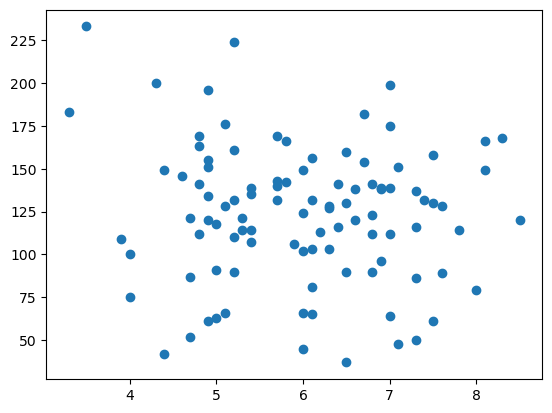

In [15]:
# EDA Process

plt.scatter(df['cgpa'],df['iq'])

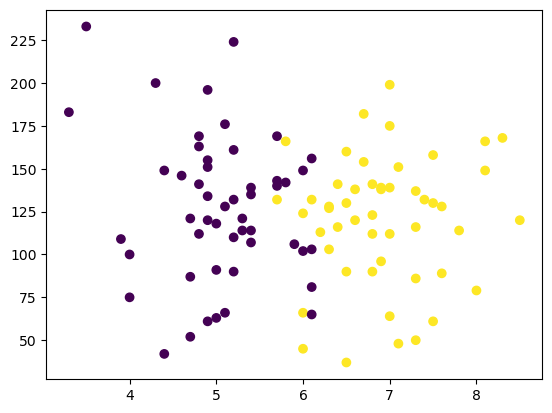

In [16]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

In [17]:
# Feature Selection
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [18]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [20]:
y.shape

(100,)

In [22]:
# Train Test 
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.1)

In [23]:
X_train

,cgpa,iq
11,6.9,138.0
18,4.0,100.0
98,6.3,103.0
90,7.3,86.0
14,6.1,103.0
...,...,...
82,6.5,37.0
56,6.1,65.0
30,7.6,128.0
3,7.4,132.0


In [46]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
X_train = scaler.fit_transform(X_train)

In [49]:
X_train

array([[ 0.77157239,  0.41068765],
       [-1.7300474 , -0.57220372],
       [ 0.25399588, -0.49460703],
       [ 1.11662339, -0.93432159],
       [ 0.08147038, -0.49460703],
       [ 0.77157239, -0.67566597],
       [ 2.15177641, -0.05489247],
       [-1.03994539,  1.05732671],
       [ 0.59904688,  0.82453665],
       [ 0.94409789, -1.91721296],
       [ 0.68530964,  0.48828434],
       [-1.12620814, -1.81375071],
       [ 1.28914889,  0.9279989 ],
       [-0.86741989, -1.52922952],
       [-0.09105513, -0.41701034],
       [-1.12620814, -0.90845603],
       [-0.26358063,  0.25549428],
       [ 0.85783514,  1.98848695],
       [ 0.34025863,  0.48828434],
       [-1.03994539,  0.48828434],
       [-1.03994539,  1.21252008],
       [-0.52236888,  0.33309096],
       [ 0.42652138, -0.83085934],
       [ 0.85783514, -0.26181697],
       [-0.86741989, -0.80499378],
       [-0.78115714,  1.39357902],
       [ 1.11662339, -1.86548183],
       [-0.95368264,  0.85040221],
       [-0.26358063,

In [51]:
X_test = scaler.transform(X_test)

In [52]:
X_test

array([[-13.95049282,  -3.24253075],
       [-13.3413966 ,  -3.24257372],
       [-14.11660997,  -3.2425773 ],
       [-13.39676898,  -3.24258043],
       [-12.95378991,  -3.24255268],
       [-14.11660997,  -3.24254328],
       [-13.23065183,  -3.24257282],
       [-14.11660997,  -3.24260371],
       [-13.95049282,  -3.24259073],
       [-12.67692799,  -3.24257282]])

In [53]:
# Train the model
from sklearn.linear_model import LogisticRegression

In [54]:
clf = LogisticRegression()

In [55]:
# Model Training
clf.fit(X_train, y_train)

LogisticRegression()

In [59]:
# Evaluate the model
y_pred = clf.predict(X_test)

In [60]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
y_test

16    0
63    1
22    0
99    1
52    1
80    0
57    1
73    0
28    0
83    1
Name: placement, dtype: int64

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test,y_pred)

0.5

In [67]:
pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 6.9 MB/s eta 0:00:0000:010:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
Note: you may need to restart the kernel to use updated packages.


In [68]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

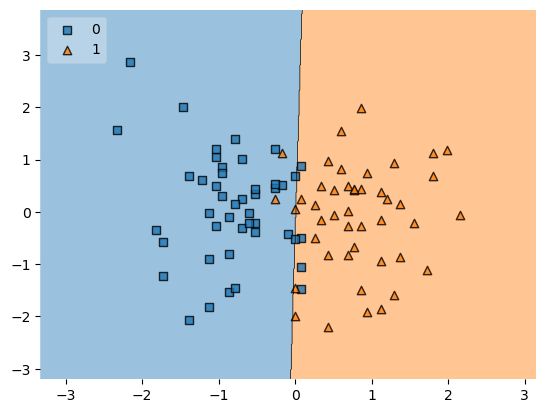

In [70]:
plot_decision_regions(X=X_train, y=y_train.values,clf=clf, legend=2)

In [72]:
import pickle

In [73]:
pickle.dump(clf,open('student_placement_model.pkl','wb'))